In [8]:
# Load config
from config import UNetTraining
# from config import UNetTraining
config = UNetTraining.Configuration()

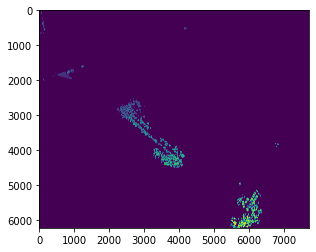

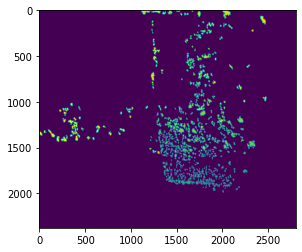

952
1095
Mask/Label Patch Shape: (10, 12, 256, 256)
CPU times: user 111 ms, sys: 278 ms, total: 389 ms
Wall time: 425 ms


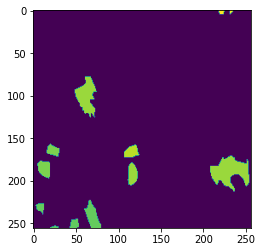

BoundingBox(left=29.748165907, bottom=-26.263430008, right=29.766500302, top=-26.248664052)
BoundingBox(left=29.995271839179495, bottom=-26.501297921923136, right=30.001920300509017, top=-26.495656803219298)
Satellite Patch Shape: (10, 12, 3, 256, 256)
CPU times: user 2.44 s, sys: 1.31 s, total: 3.75 s
Wall time: 4.08 s


In [7]:
%run "data_preparation.ipynb"
# some_func()

# Pipeline

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["state", "gender"]),
        ("numerical", numeric_preprocessor, ["age", "weight"]),
    ]
)

pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [1]:
def data_preparation(): 
    %run "1_data_preparation.ipynb"
def define_model():
    %run "2_model.ipynb"
def training():
    %run "3_training.ipynb"
def evaluation():
    %run "4_evaluation.ipynb"
def prediction():
    %run "5_prediction.ipynb"
def data_cleanup():
    %run "6_data_cleanup.ipynb"

In [2]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    # (name, transform)
    ("data_preparation", data_preparation()),
    ("model", define_model()),
    ("training", training()),
    ("evaluation", evaluation()),
    ("prediction", prediction()),
    ("data_cleanup", data_cleanup())
])

NameError: name 'rasterio' is not defined

NameError: name 'rasterio' is not defined

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
pipeline

In [3]:
set_config(display="diagram")
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'gender']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
model = LinearRegression()
# predict the target on test data 
predict_test  = model.predict(test_x)
# Root Mean Squared Error on train and test date
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

- Putting Everything Together (cf. p. 553 & davor)
    - Chaining Transformations
    - shuffle data etc.
- Präsi: Loading Preprocessing Data with TensorFlow

##### cool methods
- concatenate() 
- zip()
- window()
- reduce()
- shard()
- flat_map()
- padded_batch()
- from_generator()
- from_tensors()

## Inspiration

In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["state", "gender"]),
        ("numerical", numeric_preprocessor, ["age", "weight"]),
    ]
)

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
# The only difference is that make_pipeline generates names for steps automatically.
# Step names are needed e.g. if you want to use a pipeline with model selection utilities (e.g. GridSearchCV). With grid search you need to specify parameters for various steps of a pipeline:

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [ ]:
# example p. 109 ff. in hands-on ML ...
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([ 
    ('imputer', SimpleImputer (strategy=" median")), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()), 
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
# example p. 296
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline ([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])
param_grid = [{
    "kpca_gamma": np.linspace (0.03, 0.05, 10),
    "kpca_kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3) 
grid_search.fit(X, y)

In [ ]:
# example p. 327

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("means", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)